SUPER STORE SALES PREDICTION

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/train.csv.zip")
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,21/05/2017,28/05/2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980
9796,9797,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680
9797,9798,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880
9798,9799,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760


In [ ]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [ ]:
df.tail()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
9795,9796,CA-2017-125920,21/05/2017,28/05/2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.798
9796,9797,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.368
9797,9798,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.188
9798,9799,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.376
9799,9800,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-AC-10000487,Technology,Accessories,SanDisk Cruzer 4 GB USB Flash Drive,10.384


In [ ]:
df.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code      float64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [ ]:
df.describe()

,Row ID,Postal Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


In [ ]:
df.isna().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [ ]:
df["Region"].value_counts()

West       3140
East       2785
Central    2277
South      1598
Name: Region, dtype: int64

In [ ]:
df["Ship Mode"].value_counts()

Standard Class    5859
Second Class      1902
First Class       1501
Same Day           538
Name: Ship Mode, dtype: int64

In [ ]:
df["Segment"].value_counts()

Consumer       5101
Corporate      2953
Home Office    1746
Name: Segment, dtype: int64

In [ ]:
df["City"].value_counts()

New York City    891
Los Angeles      728
Philadelphia     532
San Francisco    500
Seattle          426
                ... 
San Mateo          1
Cheyenne           1
Conway             1
Melbourne          1
Springdale         1
Name: City, Length: 529, dtype: int64

In [ ]:
df["State"].value_counts()

California              1946
New York                1097
Texas                    973
Pennsylvania             582
Washington               504
Illinois                 483
Ohio                     454
Florida                  373
Michigan                 253
North Carolina           247
Virginia                 224
Arizona                  223
Tennessee                183
Colorado                 179
Georgia                  177
Kentucky                 137
Indiana                  135
Massachusetts            135
Oregon                   122
New Jersey               122
Maryland                 105
Wisconsin                105
Delaware                  93
Minnesota                 89
Connecticut               82
Missouri                  66
Oklahoma                  66
Alabama                   61
Arkansas                  60
Rhode Island              55
Mississippi               53
Utah                      53
South Carolina            42
Louisiana                 41
Nevada        

In [ ]:
df["Product ID"].value_counts()

OFF-PA-10001970    19
TEC-AC-10003832    18
FUR-FU-10004270    16
TEC-AC-10002049    15
TEC-AC-10003628    15
                   ..
OFF-PA-10000919     1
TEC-MA-10003353     1
OFF-LA-10003388     1
OFF-EN-10004206     1
TEC-PH-10002645     1
Name: Product ID, Length: 1861, dtype: int64

In [ ]:
df["Category"].value_counts()

Office Supplies    5909
Furniture          2078
Technology         1813
Name: Category, dtype: int64

In [ ]:
df["Sub-Category"].value_counts()

Binders        1492
Paper          1338
Furnishings     931
Phones          876
Storage         832
Art             785
Accessories     756
Chairs          607
Appliances      459
Labels          357
Tables          314
Envelopes       248
Bookcases       226
Fasteners       214
Supplies        184
Machines        115
Copiers          66
Name: Sub-Category, dtype: int64

In [ ]:
df["Product Name"].value_counts()

Staple envelope                                                        47
Staples                                                                46
Easy-staple paper                                                      44
Avery Non-Stick Binders                                                20
Staples in misc. colors                                                18
                                                                       ..
Xiaomi Mi3                                                              1
Universal Ultra Bright White Copier/Laser Paper, 8 1/2" x 11", Ream     1
Socket Bluetooth Cordless Hand Scanner (CHS)                            1
Logitech Illuminated Ultrathin Keyboard with Backlighting               1
LG G2                                                                   1
Name: Product Name, Length: 1849, dtype: int64

In [ ]:
df=df.drop(["Row ID","Order ID","Order Date","Ship Date","Customer ID","Customer Name","Country","Postal Code","Product ID"],axis=1)
df

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Product Name,Sales
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
...,...,...,...,...,...,...,...,...,...
9795,Standard Class,Corporate,Chicago,Illinois,Central,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980
9796,Standard Class,Corporate,Toledo,Ohio,East,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680
9797,Standard Class,Corporate,Toledo,Ohio,East,Technology,Phones,GE 30524EE4,235.1880
9798,Standard Class,Corporate,Toledo,Ohio,East,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760


(array([5303., 1427.,  830.,  468.,  537.,  404.,  238.,  276.,  189.,
         128.]),
 array([  0. ,  52.8, 105.6, 158.4, 211.2, 264. , 316.8, 369.6, 422.4,
        475.2, 528. ]),
 <BarContainer object of 10 artists>)

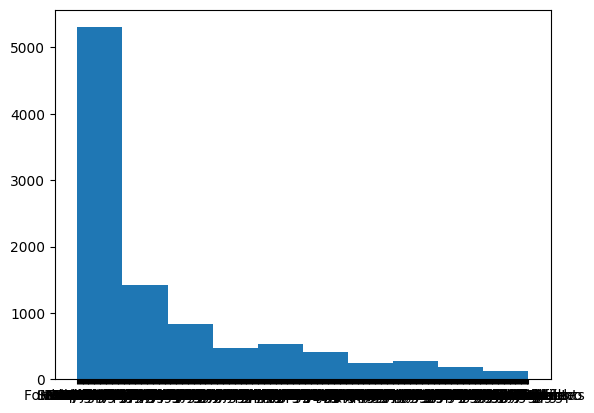

In [ ]:
plt.hist(df["City"])

<Axes: xlabel='Category', ylabel='Count'>

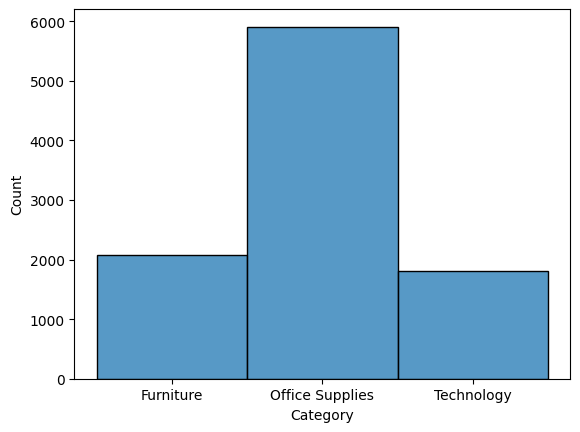

In [ ]:
sns.histplot(df["Category"])

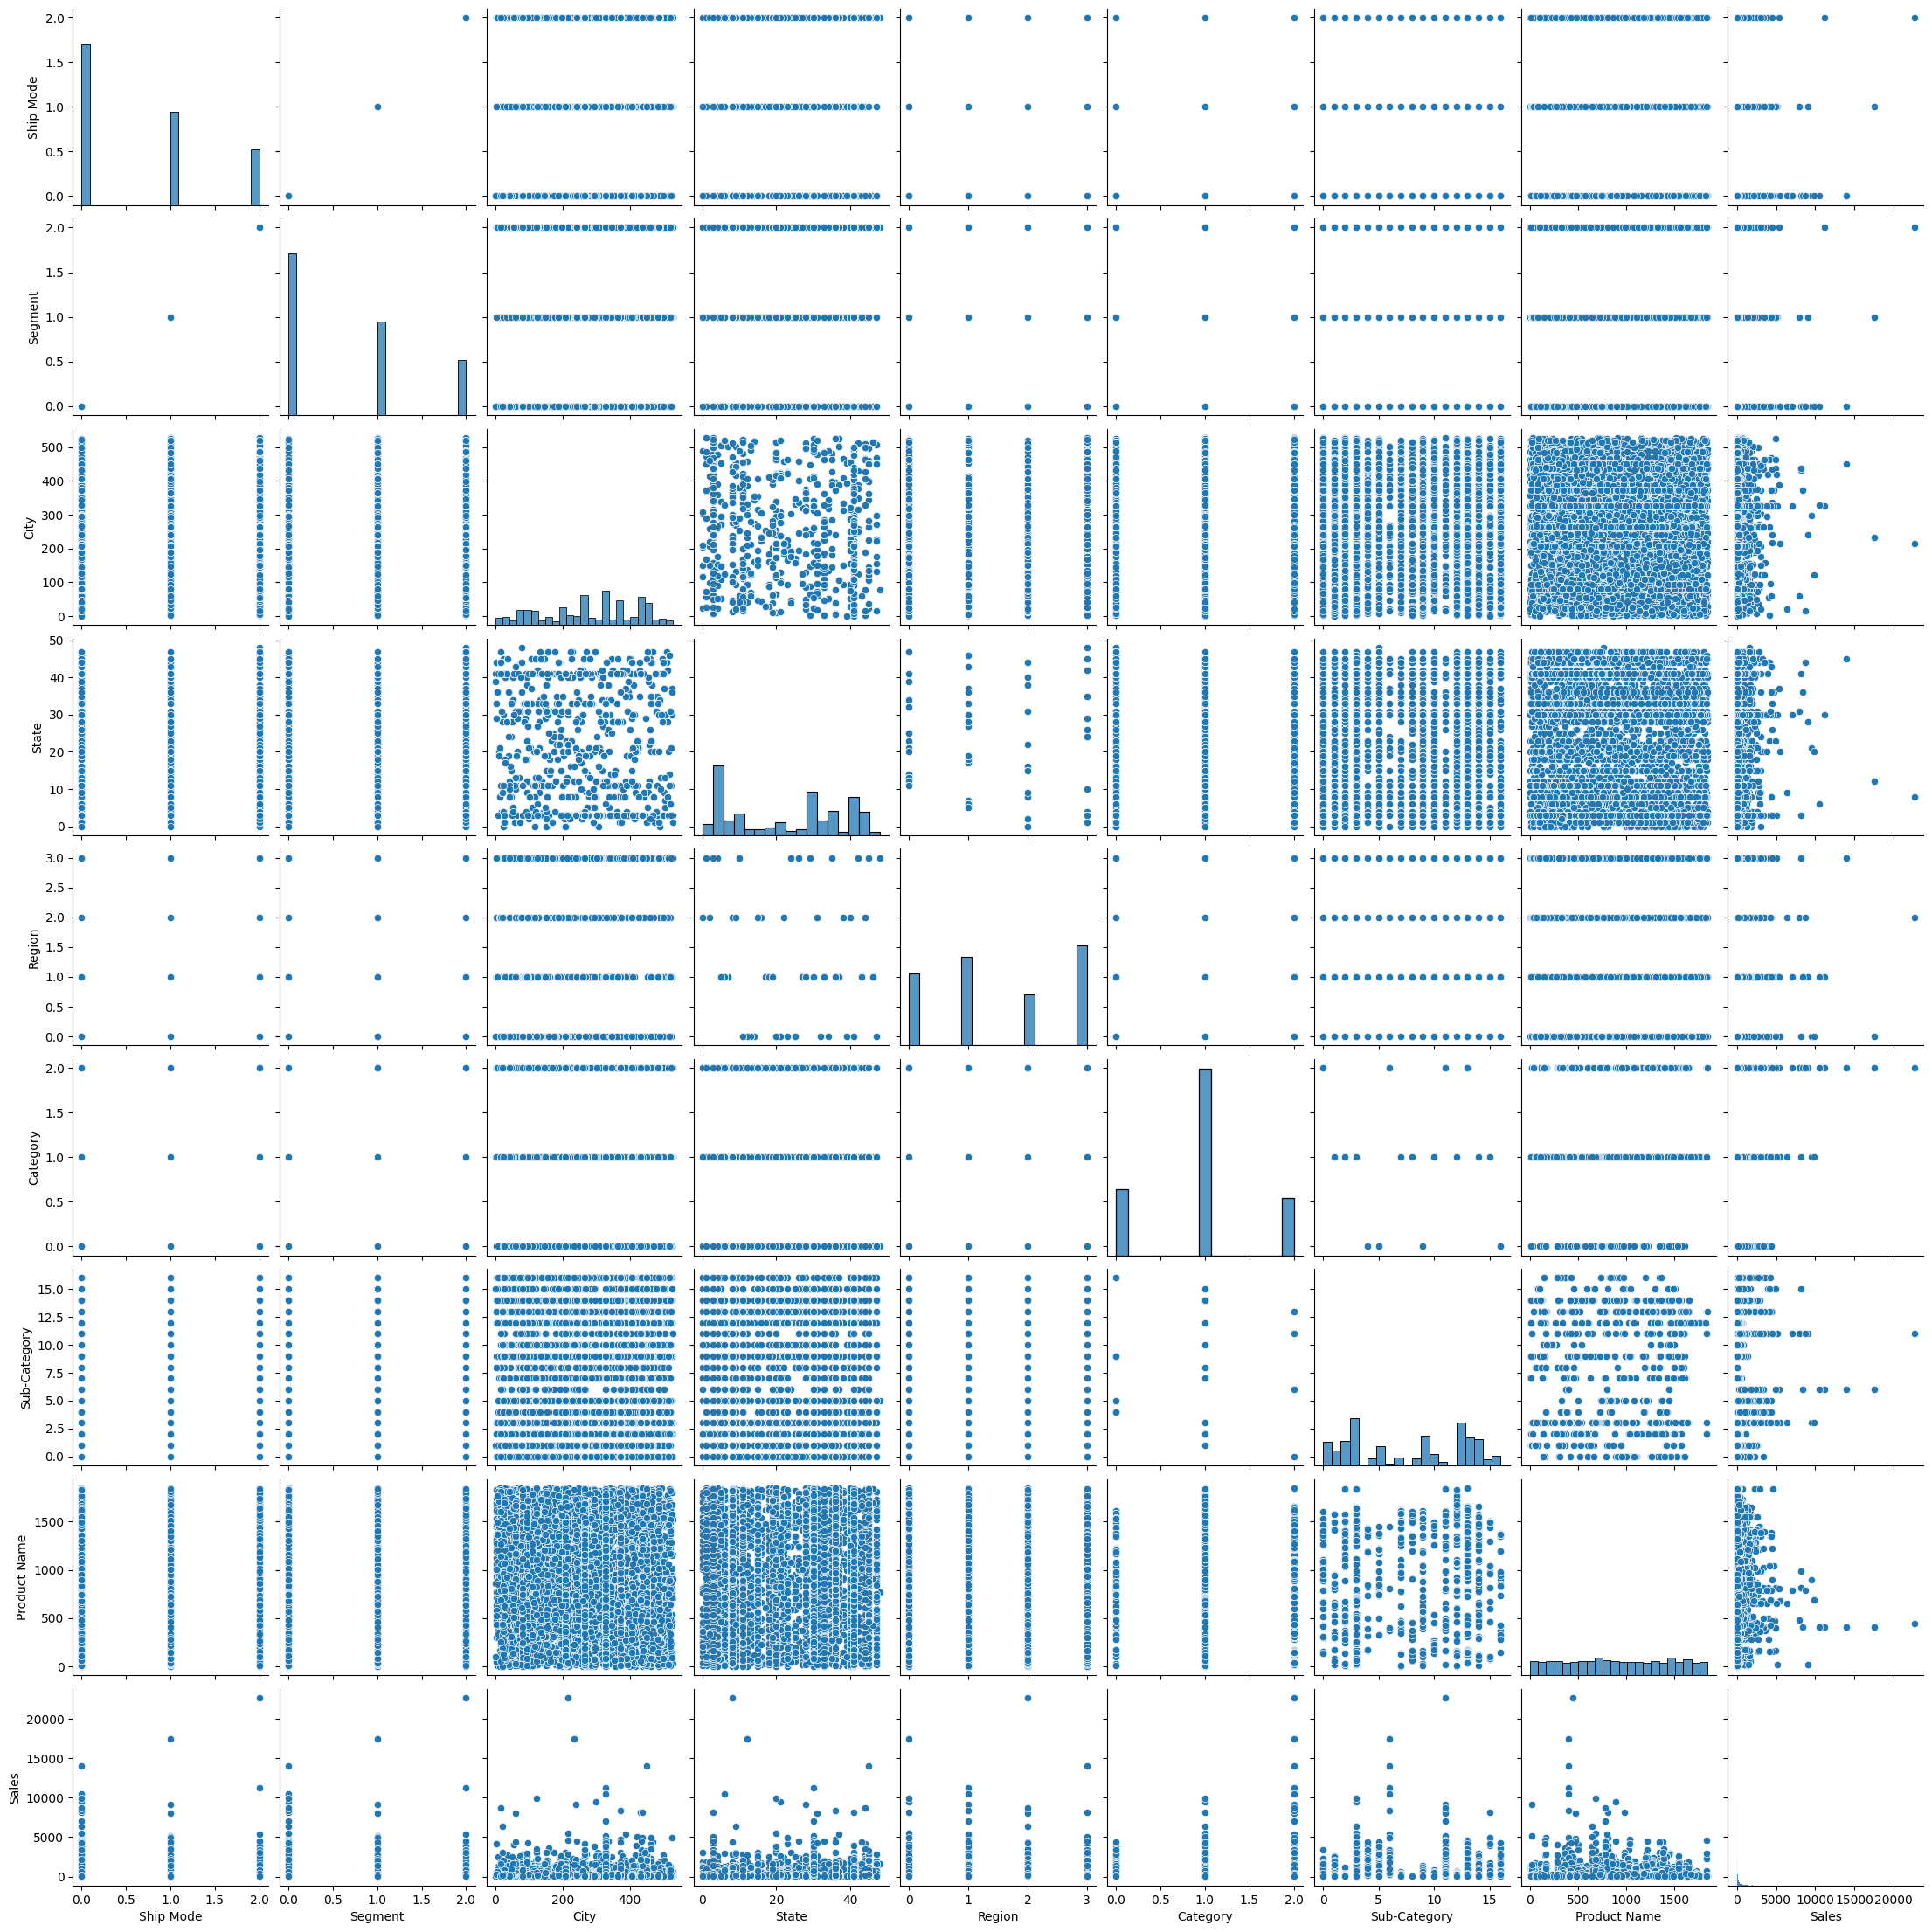

In [ ]:
sns.pairplot(df)

In [ ]:
df

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Product Name,Sales
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
...,...,...,...,...,...,...,...,...,...
9795,Standard Class,Corporate,Chicago,Illinois,Central,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980
9796,Standard Class,Corporate,Toledo,Ohio,East,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680
9797,Standard Class,Corporate,Toledo,Ohio,East,Technology,Phones,GE 30524EE4,235.1880
9798,Standard Class,Corporate,Toledo,Ohio,East,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760


convert string into integer format

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['Ship Mode']=encoder.fit_transform(df['Ship Mode'])
df['Segment']=encoder.fit_transform(df['Segment'])
df['City']=encoder.fit_transform(df['City'])
df['State']=encoder.fit_transform(df['State'])
df['Region']=encoder.fit_transform(df['Region'])
df['Category']=encoder.fit_transform(df['Category'])
df['Sub-Category']=encoder.fit_transform(df['Sub-Category'])
df['Product Name']=encoder.fit_transform(df['Product Name'])
df


,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Product Name,Sales
0,0,0,194,15,2,0,4,386,261.9600
1,0,0,194,15,2,0,5,838,731.9400
2,1,1,265,3,3,1,10,1432,14.6200
3,0,0,153,8,2,0,16,366,957.5775
4,0,0,153,8,2,1,14,573,22.3680
...,...,...,...,...,...,...,...,...,...
9795,1,1,80,11,0,1,3,408,3.7980
9796,1,1,483,33,1,1,2,277,10.3680
9797,1,1,483,33,1,2,13,724,235.1880
9798,1,1,483,33,1,2,13,148,26.3760


In [ ]:
df.isna().sum()

Ship Mode       0
Segment         0
City            0
State           0
Region          0
Category        0
Sub-Category    0
Product Name    0
Sales           0
dtype: int64

<Axes: xlabel='Ship Mode', ylabel='Count'>

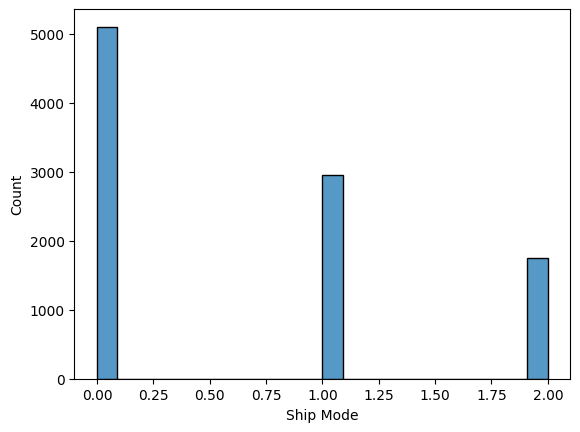

In [ ]:
sns.histplot(df["Ship Mode"])

After encoding the column "Ship Mode" the machine itself assigned values for each section 0 for vthe first class,1  is for second class and 2 is for third class.


In [ ]:
region_count=df["Region"].value_counts()
region_count

3    3140
1    2785
0    2277
2    1598
Name: Region, dtype: int64

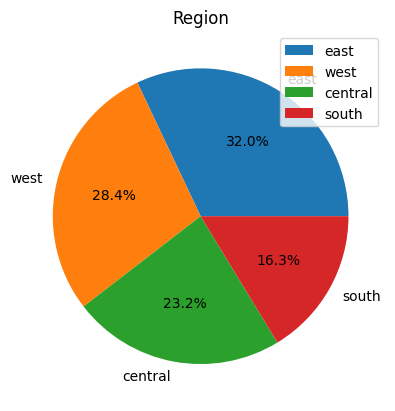

In [ ]:
mylabels=["east","west","central","south"]
plt.pie (region_count,labels=mylabels,autopct="%1.1f%%")
plt.title("Region")
plt.legend(loc="upper right")
plt.show()

<Axes: xlabel='Segment', ylabel='Count'>

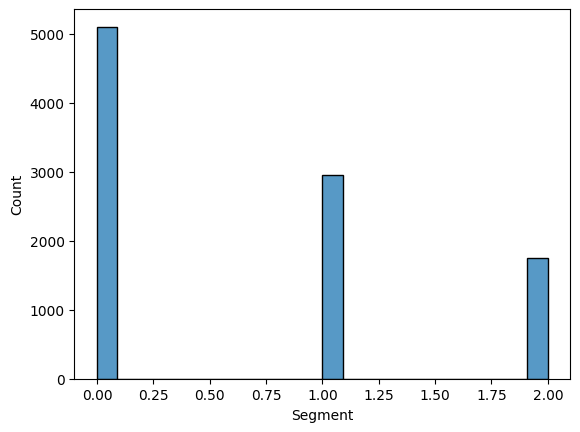

In [ ]:
sns.histplot(df["Segment"])

<Axes: xlabel='Category', ylabel='Count'>

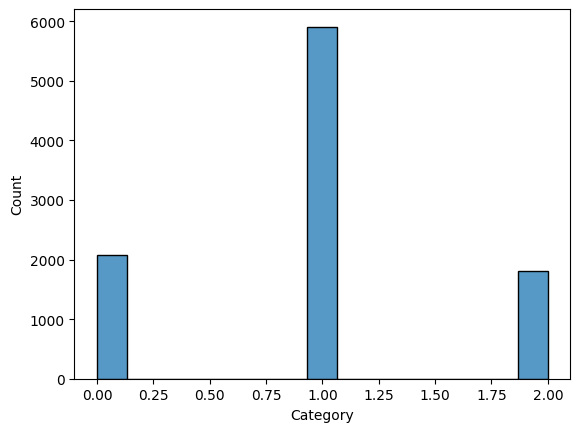

In [ ]:
sns.histplot(df["Category"])

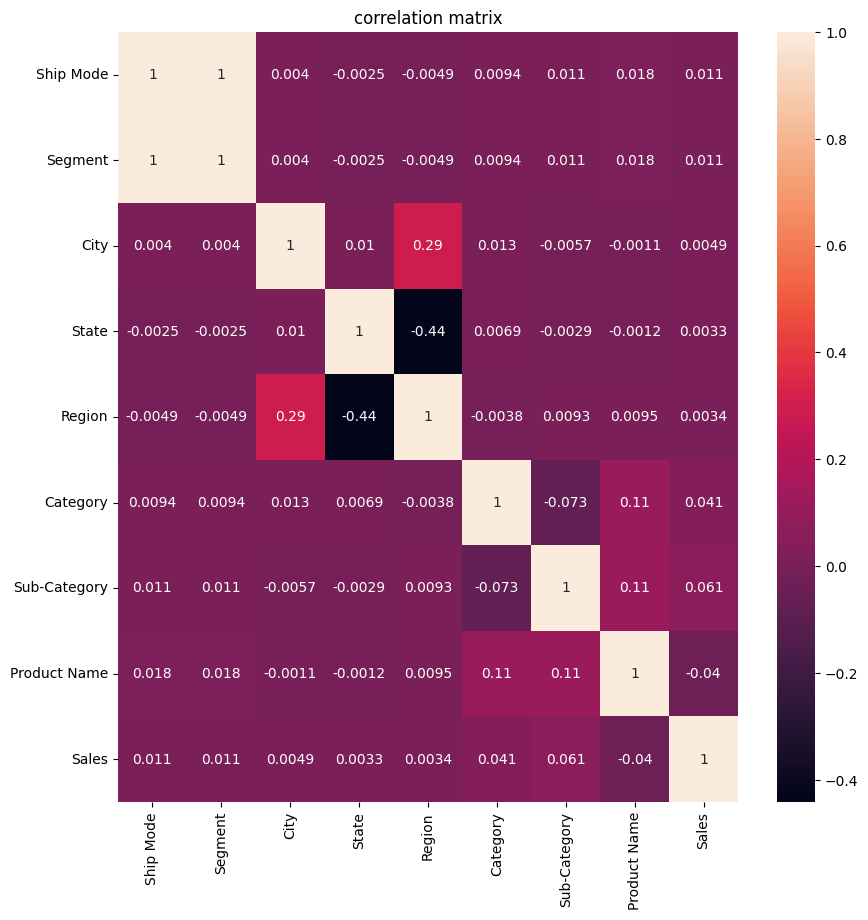

In [ ]:
corr_matrix=df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix,annot=True)
plt.title("correlation matrix")
plt.show()

In [ ]:
x=df.iloc[:,:-1].values
x

array([[   0,    0,  194, ...,    0,    4,  386],
       [   0,    0,  194, ...,    0,    5,  838],
       [   1,    1,  265, ...,    1,   10, 1432],
       ...,
       [   1,    1,  483, ...,    2,   13,  724],
       [   1,    1,  483, ...,    2,   13,  148],
       [   1,    1,  483, ...,    2,    0, 1399]])

In [ ]:
y=df.iloc[:,-1].values
y

array([261.96 , 731.94 ,  14.62 , ..., 235.188,  26.376,  10.384])

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
x_train

array([[   1,    1,  450, ...,    0,    9, 1537],
       [   1,    1,  194, ...,    1,   10,  228],
       [   1,    1,  265, ...,    2,    0, 1086],
       ...,
       [   1,    1,  450, ...,    1,    3,  688],
       [   0,    0,  436, ...,    1,   15, 1495],
       [   1,    1,  438, ...,    0,    4, 1426]])

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)
x_train

array([[0.5       , 0.5       , 0.85388994, ..., 0.        , 0.5625    ,
        0.83170996],
       [0.5       , 0.5       , 0.36812144, ..., 0.5       , 0.625     ,
        0.12337662],
       [0.5       , 0.5       , 0.5028463 , ..., 1.        , 0.        ,
        0.58766234],
       ...,
       [0.5       , 0.5       , 0.85388994, ..., 0.5       , 0.1875    ,
        0.37229437],
       [0.        , 0.        , 0.82732448, ..., 0.5       , 0.9375    ,
        0.80898268],
       [0.5       , 0.5       , 0.83111954, ..., 0.        , 0.25      ,
        0.77164502]])

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

array([ 98.56956,  27.14246, 272.02336, ...,  30.53476, 296.03348,
        93.91128])

In [ ]:
df1=pd.DataFrame({"actualvalue":y_test,"predictedvalue":y_pred,"error":y_test-y_pred})
df1

,actualvalue,predictedvalue,error
0,47.940,98.56956,-50.62956
1,11.360,27.14246,-15.78246
2,10.950,272.02336,-261.07336
3,17.480,273.78034,-256.30034
4,21.120,33.28780,-12.16780
...,...,...,...
2935,18.840,18.59700,0.24300
2936,63.824,590.99570,-527.17170
2937,6.672,30.53476,-23.86276
2938,254.970,296.03348,-41.06348


In [ ]:
from sklearn.metrics import r2_score,mean_absolute_error
print(r2_score(y_test,y_pred))

0.40564039423530374


In [ ]:
print(mean_absolute_error(y_test,y_pred))

182.68303140744243
